In [17]:
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [18]:
df_esta = pd.read_csv("data/adults_esta_enco_balanceo.csv", index_col = 0)
df_esta.head(2)

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,RowNumber,CreditScore.1,Age.1,Tenure.1,Balance.1,NumOfProducts.1,HasCrCard,IsActiveMember,EstimatedSalary.1,gender_map,France,Germany,Spain
0,0,1.246488,-1.518201,0.687130,1.276364,-0.911583,-0.471235,4428,771,23,7,156123.73,1,1,0,72990.62,0,1,0,0
1,1,0.667069,0.198164,1.032908,-0.324886,0.807737,-0.123595,191,715,41,8,56214.85,2,0,0,92982.61,0,1,0,0


In [19]:
df_enco= pd.read_csv("data/adults_enco.csv", index_col = 0)
df_enco.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_map,France,Germany,Spain
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1


- Modelo con datos codificados sin estandarizar

In [20]:
X1 = df_esta.drop("Exited", axis = 1)
y1 = df_esta["Exited"]

In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [22]:
#regresión logistica
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [23]:
X2 = df_enco.drop("Exited", axis = 1)
y2 = df_enco["Exited"]

In [24]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [25]:
log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo a nuestros datos
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test2)

- Matriz de confusión

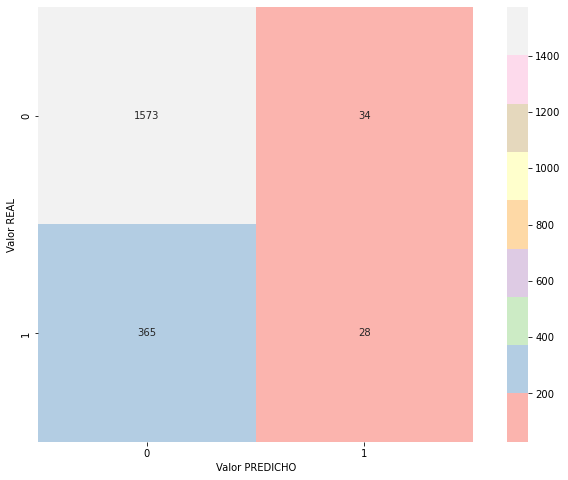

In [26]:
mat_rl = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_rl, square=True, annot=True, fmt="d", cmap = "Pastel1")

plt.xlabel('Valor PREDICHO')
plt.ylabel('Valor REAL')
plt.show();

- Metricas

In [27]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [29]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.670762,0.668952,0.672906,0.670923,0.341529,test,Regresión logistica Esta
1,0.676496,0.673248,0.686640,0.679878,0.352984,train,Regresión logistica Esta


- De estas métricas podemos extraer las siguientes conclusiones:
    - El modelo que hemos generado con nuestros datos estandarizados y codificaso acierta el 67% 
    - En la precision tenemos un valor casi del 67% otra, lo que quiere decir que nuestro modelo se equivoca un 33% de las veces que predice si un cliente se irá de nuestra compañía. 
    - En la métrica recall tenemos un valor de casi el 68%, que nos indica que nuestro modelo es capaz de capturar este porcentaje de clientes
    - En el kappa tenemos un valor de 0.34, la concorancia de nuestros datos es moderada, es probable que nuestro modelo pudiera estar acertando por azar. 

- Los valores del train y del test en nuestro modelo estan bastante alineados, lo que nos indica que nuestro modelo están bastante ajustados y no estamos incurriendo ni en over fitting ni en underfitting. Nuestro modelo podría ser válido. 
